# The Heisenberg Model

Goal: To simulate the two qubit open chain isotropic Heisenberg model and plot the magnetisation.

Hamiltonian:
$$
H = J\big(\sigma_x\otimes\sigma_x+\sigma_y\otimes\sigma_y+\sigma_z\otimes\sigma_z\big)
$$
The time evolution operator: 
$$
U = e^{-iJt\sigma_x\otimes\sigma_x} e^{-iJt\sigma_y\otimes\sigma_y} e^{-iJt\sigma_z\otimes\sigma_z}
$$

In [1]:
#some necessary imports libraries

import numpy as np
from numpy import pi
import qiskit
from qiskit import *
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_gate_map, plot_circuit_layout, array_to_latex
from qiskit.providers.aer import noise
from qiskit.quantum_info import Operator
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
IBMQ.load_account()
backend = Aer.get_backend('qasm_simulator')

In [8]:
# Creating circuit
def ev_circ(qc,J,t):
    
    #qc.h(qr[0])
    #qc.barrier()
    psi = J*t
    
    for i in range(1):
        #sigma_x sigma_x term
        qc.ry(pi/2, qr[i])
        qc.ry(pi/2, qr[i+1])
        qc.cx(qr[i],qr[i+1])
        qc.rz(2*psi, qr[i+1])
        qc.cx(qr[i],qr[i+1])
        qc.ry(-pi/2, qr[i+1])
        qc.ry(-pi/2, qr[i])
        qc.barrier()
        
        #sigma_y sigma_y term
        qc.rx(pi/2, qr[i])
        qc.rx(pi/2, qr[i+1])
        qc.cx(qr[i],qr[i+1])
        qc.rz(2*psi, qr[i+1])
        qc.cx(qr[i],qr[i+1])
        qc.rx(-pi/2, qr[i+1])
        qc.rx(-pi/2, qr[i])
        qc.barrier()
        
        #sigma_z sigma_z term
        qc.cx(qr[i],qr[i+1])
        qc.rz(2*psi, qr[i+1])
        qc.cx(qr[i],qr[i+1])

    return qc


#Simulating circuit
def sim(i):
    [circ2[j].measure(qr[i],cr[0]) for j in range(len(circ2))]
    result_sim = execute(circ2, backend, shots=1024).result()
    a = result_sim.get_counts()
    p0 = []
    p1 = []
    for k in range(len(a)):
        if '0' in a[k]:
            p0.append(a[k]['0'])
        else:
            p0.append(0)
        if '1' in a[k]:
            p1.append(a[k]['1'])
        else:
            p1.append(0)
    p = (np.array(p0)-np.array(p1))/(2*1024)
    return p

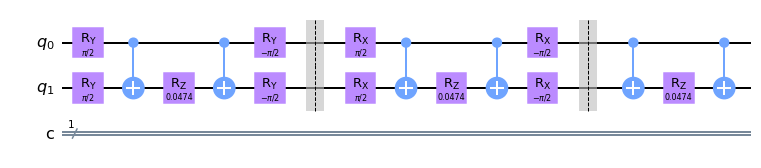

In [9]:
qc = QuantumCircuit(qr,cr)
t = 1
circ = ev_circ(qc,J,t)
circ.draw('mpl')

In [4]:
J = 0.01183898*2
total_t = 100
del_t = 1
num_steps = int(total_t/del_t)

qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(1, 'c')

circ2 = []
d = []

for step in range(0, num_steps+1):
    qc = QuantumCircuit(qr,cr)
    t = (step)*del_t
    d.append(J*t)
    circ2.append(ev_circ(qc,J,t))

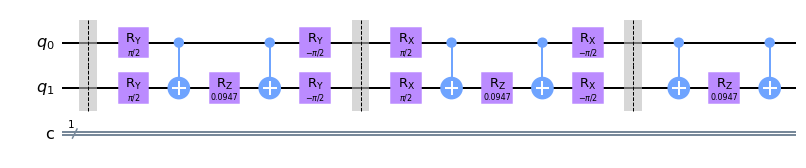

In [5]:
circ2[2].draw('mpl')

In [115]:
prob = {}
for i in range(2):
    p = sim(i)
    prob['q'+str(i)] = p

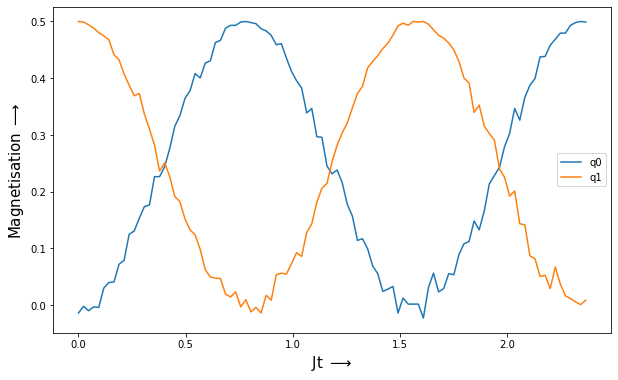

In [116]:
fig = plt.figure(figsize=[10,6])
plt.plot(d,prob['q0'])
plt.plot(d,prob['q1'])
#plt.title('')
plt.xlabel(rf'Jt $\longrightarrow$',fontsize=15)
plt.ylabel(rf'Magnetisation $\longrightarrow$',fontsize=15)
plt.legend(['q0','q1'])
plt.show()

Reference: <a href='https://onlinelibrary.wiley.com/doi/abs/10.1002/qute.201900052?casa_token=ReqqCHdF4LQAAAAA:vUJdTFIt62NK3ziJQsCcRbVbwAvY_tfRUz5L0lQN100jRw3aIH5H4aU92wwwfQZxOTw7v6RuOcXuYAY'>Tacchino, Francesco, et al. "Quantum computers as universal quantum Simulators: state‐of‐the‐art and perspectives." Advanced Quantum Technologies 3.3 (2020): 1900052.</a>